In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'AMOV'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,15.32,14.65,14.66,15.32,12100.0,14.950639
2019-03-21,15.28,15.01,15.15,15.28,3700.0,14.911603
2019-03-22,14.77,14.61,14.67,14.77,1200.0,14.413900
2019-03-25,14.93,14.56,14.93,14.56,700.0,14.208963
2019-03-26,14.57,14.47,14.47,14.57,2300.0,14.218720


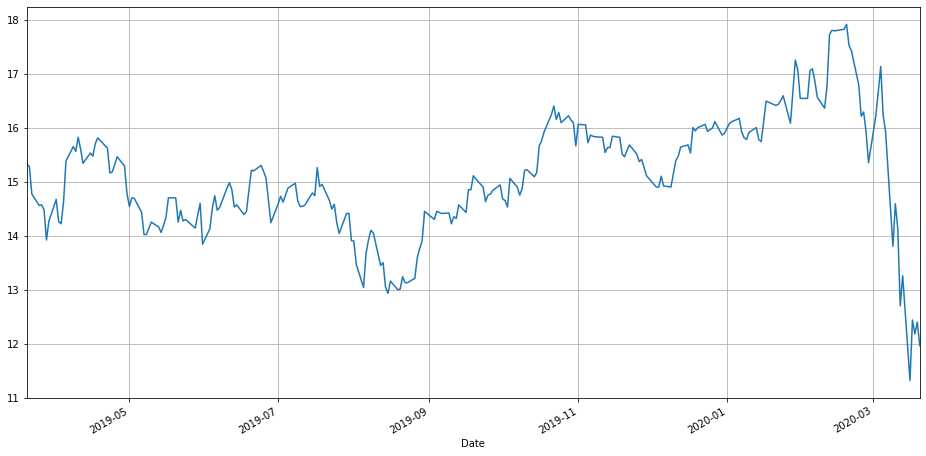

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

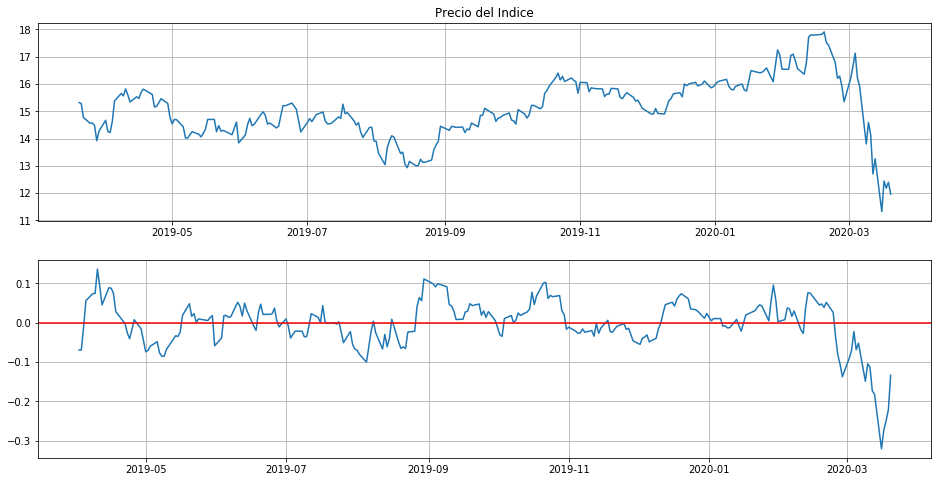

,Close,ROC_10,Recomendación
Date,,,
2019-04-05,15.380000,0.056319,Se recomienda COMPRAR la acción.
2019-04-22,15.620000,-0.001917,Se recomienda VENDER la acción.
2019-04-26,15.460000,0.007823,Se recomienda COMPRAR la acción.
2019-04-29,15.290000,-0.015454,Se recomienda VENDER la acción.
2019-05-17,14.700000,0.018711,Se recomienda COMPRAR la acción.
2019-05-31,13.840000,-0.058503,Se recomienda VENDER la acción.
2019-06-04,14.510000,0.018246,Se recomienda COMPRAR la acción.
2019-06-17,14.390000,-0.008270,Se recomienda VENDER la acción.
2019-06-19,14.840000,0.025570,Se recomienda COMPRAR la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]